# What is Logistic Regression ?
Logistic Regression is used when the dependent variable(target) is categorical.
For example,
- To predict whether an email is spam (1) or (0)
- Whether the tumor is malignant (1) or not (0)


Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.


From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.


Types of Logistic Regression

1. Binary Logistic Regression
The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression
Three or more categories with ordering. Example: Movie rating from 1 to 5


# Iris Data for classification of different species of flowers

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [4]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
len(iris.data)

150

In [7]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Plotting sepal width and length

In [9]:
X = iris.data[:,:2]
Y = iris.target

Text(0.5, 1.0, 'Sepal size distribution')

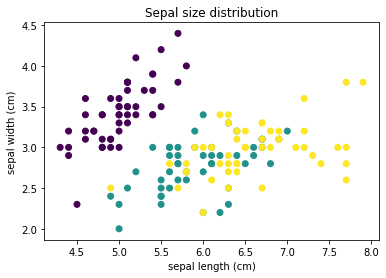

In [10]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Sepal size distribution")

Plotting for petal length and petal width

Text(0.5, 1.0, 'Petal size distribution (cm)')

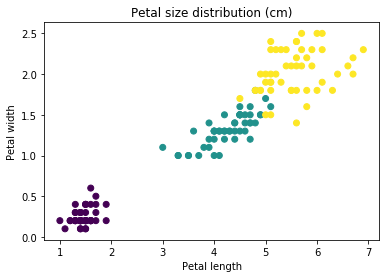

In [11]:
X = iris.data[:,2:]
Y = iris.target
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal size distribution (cm)')

### Logistic regression model 

- predicts that if a sample is one of the three species or not.
- each input is multiplied by the weights and a bias is added. 
- final number is passed through a non linear function and which will give values which are close to zero and close to one. 
- This ranges from 0 to 1 which can be used to identify. 

### Sigmoid Function 
- is commonly used in Log. reg. and artificial neurons. It's one way to convert continuous values into more of a binary value. This also called an activation function in neural networks 

Text(0.5, 1.0, 'Logistic Sigmoid')

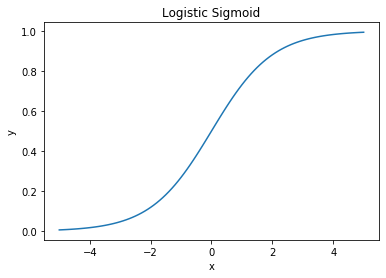

In [12]:
def sigmoid(z):
    return 1.0/(1 + math.e ** (-z))


#demo code for checking if the function works fine 
x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')


### Prediction Function 
- takes in one sample, multiplies it by weights and adds a bias and passes the sum throught the above sigmoid function. This function will be used to determine weights and biases during training as well as make predictions after training is complete.

In [13]:
def predict(sample):
    result = 0.0 
    for i in range(len(sample)):
        result = result + weights[i] * sample[i]
        
    result = result + bias 
    return sigmoid(result)

### Loss Function and the cost Function 
- the loss function compares the predicted output with the expected output for a single training sample. If there is high, the loss is high.
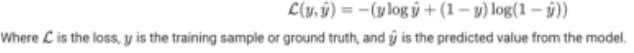

- y is the expected training value 
- y^ is the predicted value 

In [14]:
def loss(y_train, y_predicted):
    return -(y_train* math.log(y_predicted) + (1-y_train)* math.log(1 - y_predicted))

Text(0.5, 1.0, 'loss near 0.90')

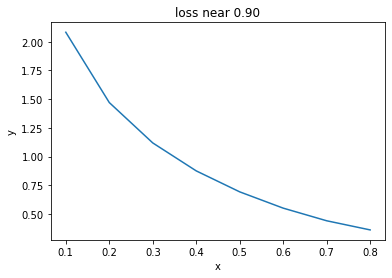

In [15]:
# sample values for knowing how function behaves for a fixed training value and a range of predicted values

y_train = 0.9 
x = [i * 0.1 for i in range(1,9)]
y = [loss(y_train, yp) for yp in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('loss near %0.2f' % y_train)

### Gradient Descent
- attempts to mimimize the cost function by iteratively adjusting weights and biases in the direction of lower cost. This is achieved by computing the derivative or slope of the cost function for each of the weights and biases. 
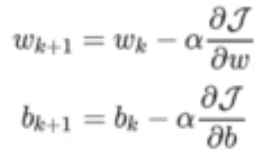

- w is for weights
- b is for bias 
- alpha is for learning rate 


Text(0.5, 1.0, 'Simple Function')

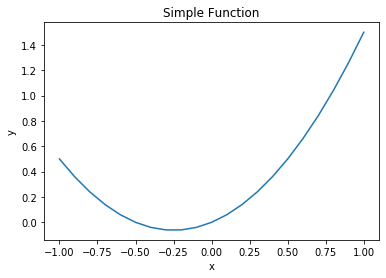

In [16]:
def parabola(x):
    return x**2 + x/2.0

x = [i * 0.1 for i in range (-10,11)]
y = [parabola(xi) for xi in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Function')

In [ ]:
x_k = 0.0
learning_rate = 0.1 

def derivative(x):
    return 2*x + 0.5

for i in range(5):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate * gradient
    
print('Estimated minimum %0.2f, %0.2f' %(x_k, parabola(x_k)))
print('DErivative gradient %0.2f' % gradient)

x = [i * 0.1 for i in range(-10,11)]
y = [parabola(xi) for xi in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')